In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import interpretable,model
%reload_ext autoreload

# Load data

In [15]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df, breast_cancer.target, train_size=0.9,
                                                    stratify=breast_cancer.target, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 31), (57, 31), (512,), (57,))

In [25]:
list_model = ['lr']

In [26]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,list_model=list_model,types='classification')

we have done with these models:
Logistic_Regression


# SHAP

In [64]:
interpretable.shap_explainer(X_test,models[0],no_test=9,types='single',
                             types_exp='linier',X_train=X_train,col=[None,None])

In [68]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='multiple',
                             types_exp='linier',X_train=X_train,col=[None,None])

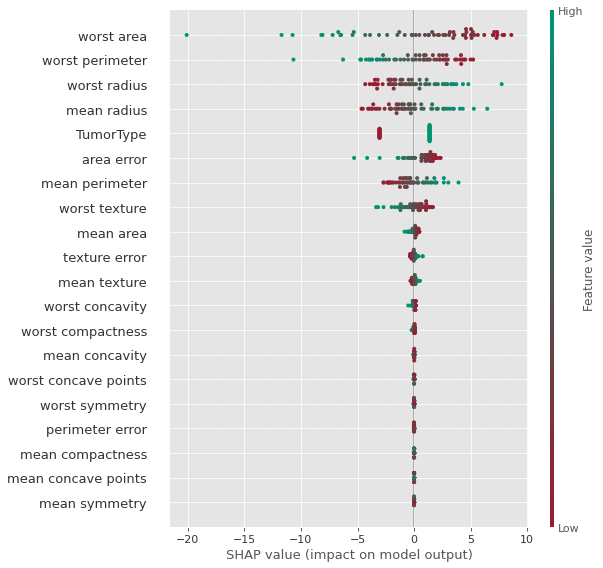

None

In [69]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='if',
                             types_exp='linier',X_train=X_train,col=[None,None])

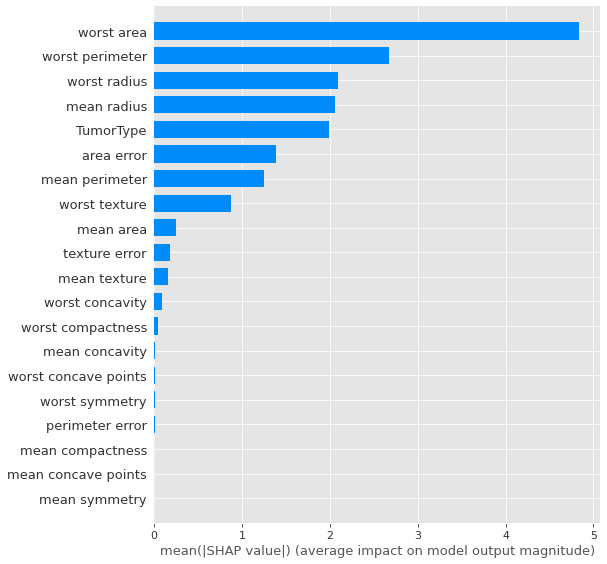

In [71]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='if_bar',
                             types_exp='linier',X_train=X_train,col=[None,None])

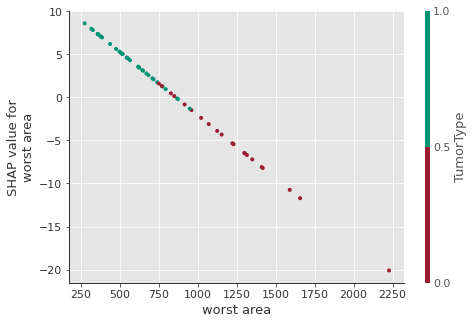

None

In [74]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='interaction',
                             types_exp='linier',X_train=X_train,col=["worst area","TumorType"])

## Local Interpretability

The expected value is  -0.23981834314426587


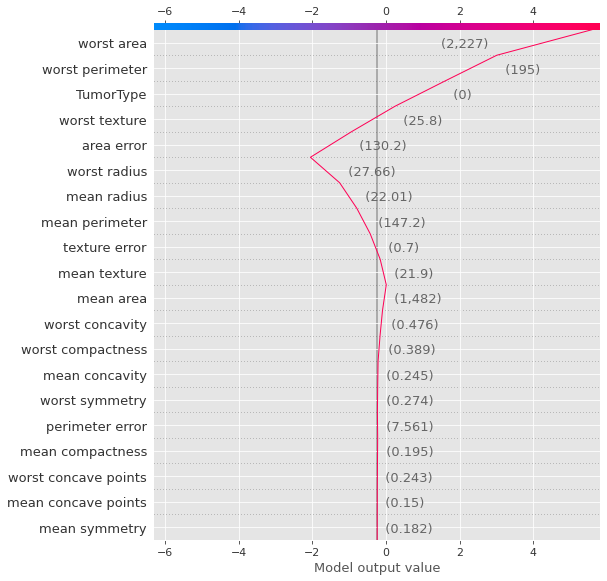

In [75]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='decision',
                             types_exp='linier',X_train=X_train,col=[None,None])

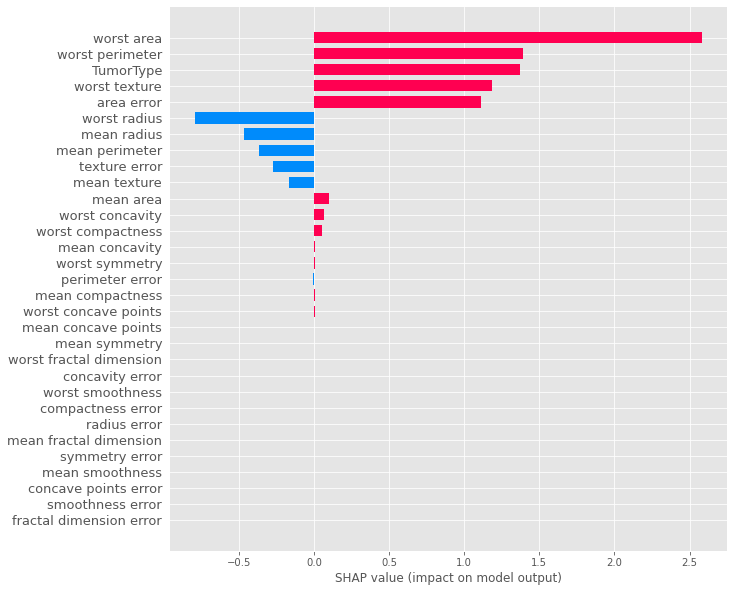

In [76]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='bar',
                             types_exp='linier',X_train=X_train,col=[None,None])

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

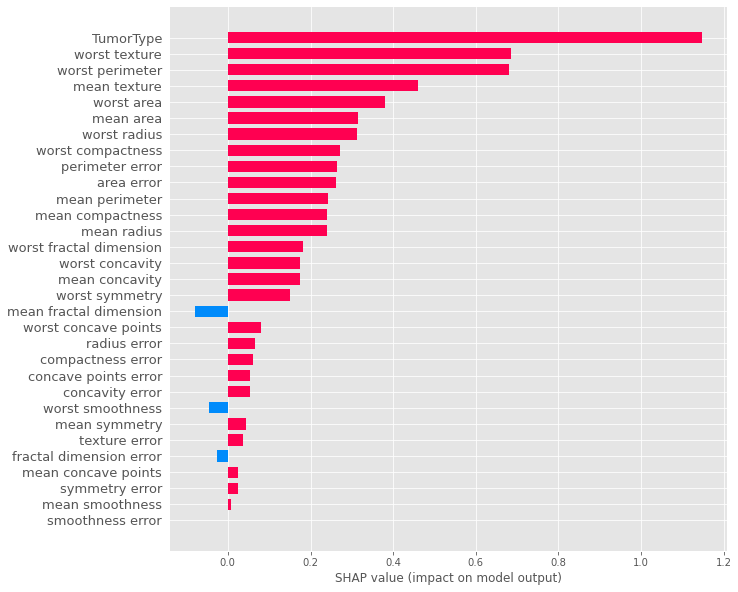

In [77]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='bar',
                             types_exp='linier',X_train=X_train,col=[None,None],
                            feature_perturbation='correlation_dependent')